## Expt.-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.
## Name:Nihar Naringrekar      Roll No:48

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


In [43]:
X= np.array ([1,2,3]).reshape(-1,1)
y= np.array ([2,3,5])

# OLS method

In [44]:
model = LinearRegression()
model.fit(X,y)

w=model.coef_[0]
b=model.intercept_

In [42]:
print(f"w(slope)={w}")
print(f"b(intercept)={b}")

w(slope)=1.4999999999999993
b(intercept)=0.3333333333333348


In [45]:
y_pred = model.predict(X)

In [46]:
print("\nPrediction for training data:")

for xi,yi,ypi in zip(X.flatten(),y,y_pred):
    print(f"X={xi},Actual Sales={yi},Predicted Sales={ypi:.2f}")


Prediction for training data:
X=1,Actual Sales=2,Predicted Sales=1.83
X=2,Actual Sales=3,Predicted Sales=3.33
X=3,Actual Sales=5,Predicted Sales=4.83


In [47]:
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

In [48]:
print(f"nMean Squared Errors(MSE)={mse:.4f}")
print(f"R² Score = {r2:.4f}")

nMean Squared Errors(MSE)=0.0556
R² Score = 0.9643


# MLE Method

In [49]:
from scipy.optimize import minimize

In [50]:
X= np.array ([1,2,3])
y= np.array ([2,3,5])

In [51]:
def neg_log_likelihood (params):
    w, b = params
    sigma2 = 1 
    y_pred = w*X + b
    nll = 0.5*np.sum((y - y_pred)**2/sigma2)
    return nll

In [52]:
initial_guess = [0,0]

In [53]:
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x

print(f"MLE w={w_mle}")
print(f"MLE b={b_mle}")

MLE w=1.500000003897125
MLE b=0.3333333918730798


In [54]:
y_pred = w_mle * X + b_mle

print("\nPrediction for training data:")
for xi,yi,ypi in zip(X, y, y_pred):
    print(f"X={xi},Actual Sales={yi},Predicted Sales={ypi:.2f}")


Prediction for training data:
X=1,Actual Sales=2,Predicted Sales=1.83
X=2,Actual Sales=3,Predicted Sales=3.33
X=3,Actual Sales=5,Predicted Sales=4.83


In [55]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y,y_pred)

In [56]:
print(f"nMean Squared Errors(MSE)={mse:.4f}")
print(f"R² Score = {r2:.4f}")

nMean Squared Errors(MSE)=0.0556
R² Score = 0.9643


# GD

In [93]:
import matplotlib.pyplot as plt
X= np.array ([1,2,3])
y= np.array ([2,3,5])

In [94]:
w,b = 0,0
alpha = 0.01
n_iter = 10000
n = len(X)

In [95]:
for i in range (n_iter):
    y_pred = w*X.flatten()+b
    dw = (-2/n)*np.sum(X.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w -=  alpha * dw
    b -= alpha * db
print("Slope(w):",w)
print("intercept(b):",b)

Slope(w): 1.499999999995756
intercept(b): 0.33333333334298026


In [96]:
y_pred = w*X+b

print("\nPrediction for training data:")
for xi,yi,ypi in zip(X, y, y_pred):
    print(f"X={xi},Actual Sales={yi},Predicted Sales={ypi:.2f}")


Prediction for training data:
X=1,Actual Sales=2,Predicted Sales=1.83
X=2,Actual Sales=3,Predicted Sales=3.33
X=3,Actual Sales=5,Predicted Sales=4.83


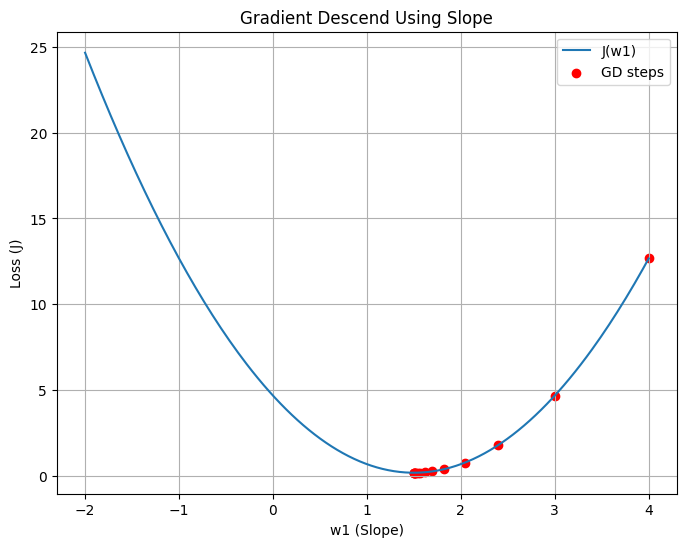

In [97]:
X= np.array ([1,2,3])
y= np.array ([2,3,5])
n=len(X)

def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(X)
    y_pred = w1*X+w0
    return np.sum((y - y_pred)**2)


def gradient(w1):
    w0= np.mean(y) - w1 *np.mean(X)
    y_pred = w1*X+w0
    return -2 * np.sum(X*(y - y_pred))

lr=0.1
w1=4
iterations =15

w1_values =[]
loss_values=[]

for i in range (iterations):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 = w1 - lr*grad

w_space = np.linspace(-2,4,200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(8,6))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color = "red", label="GD steps")
plt.xlabel("w1 (Slope)")
plt.ylabel("Loss (J)")
plt.title("Gradient Descend Using Slope")
plt.legend()
plt.grid(True)
plt.show()